# Probability(ECSE231L) Project:

## -Made by Shreyans Murkute (E20CSE415), Ujjwal Yadav(E20CSE408), Samarth Sharma(E20CSE400)

# Importing all Required Packages

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import regex
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None 

# Reading .csv file

In [3]:
df_ini= pd.read_csv("./Play Store Data/Google-Playstore.csv")
#df_ini.head()
df1= df_ini


In [ ]:
sns.heatmap(df1.isnull())
plt.show();

# Cleaning Dataset and Making New Columns according to our Requirements

In [13]:
df1.dropna(how= 'any',subset=['App Name','Rating', 'Rating Count'] ,inplace=True)
df1.drop(['Minimum Installs', 'Released', 'Developer Email','Minimum Android', 'Developer Website', 'Developer Id'
          ,'Scraped Time'], axis=1,inplace=True)

In [14]:
df1.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Maximum Installs', 'Free', 'Price', 'Currency', 'Size', 'Last Updated',
       'Content Rating', 'Privacy Policy', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

In [15]:
df1['Privacy Policy']= df1['Privacy Policy'].fillna("No Privacy Policy")

In [16]:
df1["Size"].isnull().any()

False

In [17]:
df1["Size Int"]= df1["Size"].str.extract(r'(^[0-9.]+)')
df1["Size Int"].astype(float)

0          10.0
1           2.9
2           3.7
3           1.8
4           6.2
           ... 
2312939    77.0
2312940    44.0
2312941    29.0
2312942    10.0
2312943     5.2
Name: Size Int, Length: 2290059, dtype: float64

In [18]:
df1['Size Int']= df1["Size Int"].astype(float)
df1.dtypes

App Name             object
App Id               object
Category             object
Rating              float64
Rating Count        float64
Installs             object
Maximum Installs      int64
Free                   bool
Price               float64
Currency             object
Size                 object
Last Updated         object
Content Rating       object
Privacy Policy       object
Ad Supported           bool
In App Purchases       bool
Editors Choice         bool
Size Int            float64
dtype: object

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2290059 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs          object 
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Currency          object 
 10  Size              object 
 11  Last Updated      object 
 12  Content Rating    object 
 13  Privacy Policy    object 
 14  Ad Supported      bool   
 15  In App Purchases  bool   
 16  Editors Choice    bool   
 17  Size Int          float64
dtypes: bool(4), float64(4), int64(1), object(9)
memory usage: 270.8+ MB


# Exploratory Data Analysis

## 1) No of Applications in Each Category: 

In [20]:
dfcat= df1.groupby("Category", as_index=False)['App Id'].count()
dfcat.rename(columns= {"App Id":'Count of Apps'}, inplace=True)

dfcat

,Category,Count of Apps
0,Action,26827
1,Adventure,22787
2,Arcade,52706
3,Art & Design,18392
4,Auto & Vehicles,17951
5,Beauty,11699
6,Board,10443
7,Books & Reference,116493
8,Business,142151
9,Card,8046


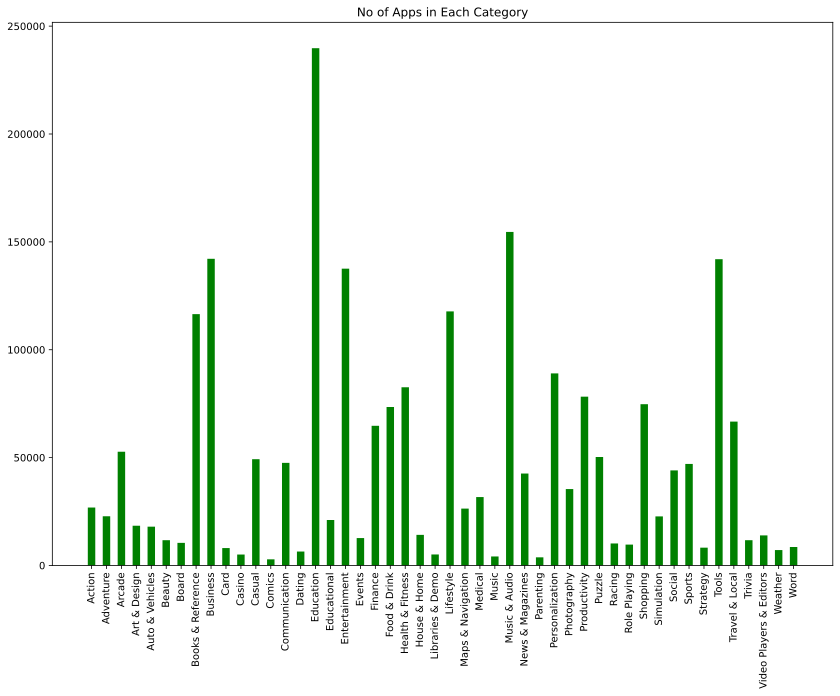

In [21]:
plt.rcParams["figure.figsize"] = (14, 10)
plt.bar(dfcat['Category'], dfcat['Count of Apps'],color='green', width=0.5)

plt.xticks(rotation='vertical')
plt.title("No of Apps in Each Category")
plt.show();

## 2) Average Installs in Each Category: 

In [22]:
dfinstalls= df1.groupby("Category", as_index=False)['Maximum Installs'].sum()
dfinstalls.rename(columns= {"Maximum Installs": "No of Installs in Category"}, inplace=True)


dfcat['Average Installs']= dfinstalls["No of Installs in Category"]/dfcat['Count of Apps']
dfcat['Average Installs']= dfcat['Average Installs'].astype('int64')


In [23]:
dfcat

,Category,Count of Apps,Average Installs
0,Action,26827,1144069
1,Adventure,22787,430038
2,Arcade,52706,486944
3,Art & Design,18392,98515
4,Auto & Vehicles,17951,170032
5,Beauty,11699,60842
6,Board,10443,505455
7,Books & Reference,116493,88489
8,Business,142151,60329
9,Card,8046,414949


## 3) Total Installs In Each Category

In [24]:
dfinstalls

,Category,No of Installs in Category
0,Action,30691954114
1,Adventure,9799281950
2,Arcade,25664894856
3,Art & Design,1811902785
4,Auto & Vehicles,3052253089
5,Beauty,711796191
6,Board,5278470147
7,Books & Reference,10308452658
8,Business,8575880943
9,Card,3338686210


## 4) Identifying the Most Used Application in Each Category and Its corresponding Installs: 

In [25]:
cat= list(df1['Category'].unique())
cat= sorted(cat)
dfcat['Max Installs of an App']=0
dfcat['Max Installs of an App']= dfcat['Max Installs of an App'].astype('int64')
dfcat['Max Installed App']= ''
for x in cat:
    dftemp= df1[df1['Category']==x]
    dfcat["Max Installs of an App"][cat.index(x)]= max(dftemp['Maximum Installs'])
    dftemp.sort_values("Maximum Installs", ascending=False, inplace=True)
    dfcat['Max Installed App'][cat.index(x)]= dftemp["App Name"].iloc[0]
    
dfcat['Max Installs of an App']= dfcat['Max Installs of an App'].astype('int64')


In [26]:
dfcat

,Category,Count of Apps,Average Installs,Max Installs of an App,Max Installed App
0,Action,26827,1144069,976536041,Garena Free Fire - Rampage
1,Adventure,22787,430038,427633153,Roblox
2,Arcade,52706,486944,1704495994,Subway Surfers
3,Art & Design,18392,98515,134619454,"Canva: Graphic Design, Video Collage, Logo Maker"
4,Auto & Vehicles,17951,170032,1976625745,Android Auto
5,Beauty,11699,60842,53849836,Perfect365: One-Tap Makeover
6,Board,10443,505455,589524427,Ludo King™
7,Books & Reference,116493,88489,3202676731,"Google Play Books - Ebooks, Audiobooks, and Co..."
8,Business,142151,60329,1410817280,Secure Folder
9,Card,8046,414949,129283628,Solitaire


C:\Users\smurk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smurk\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


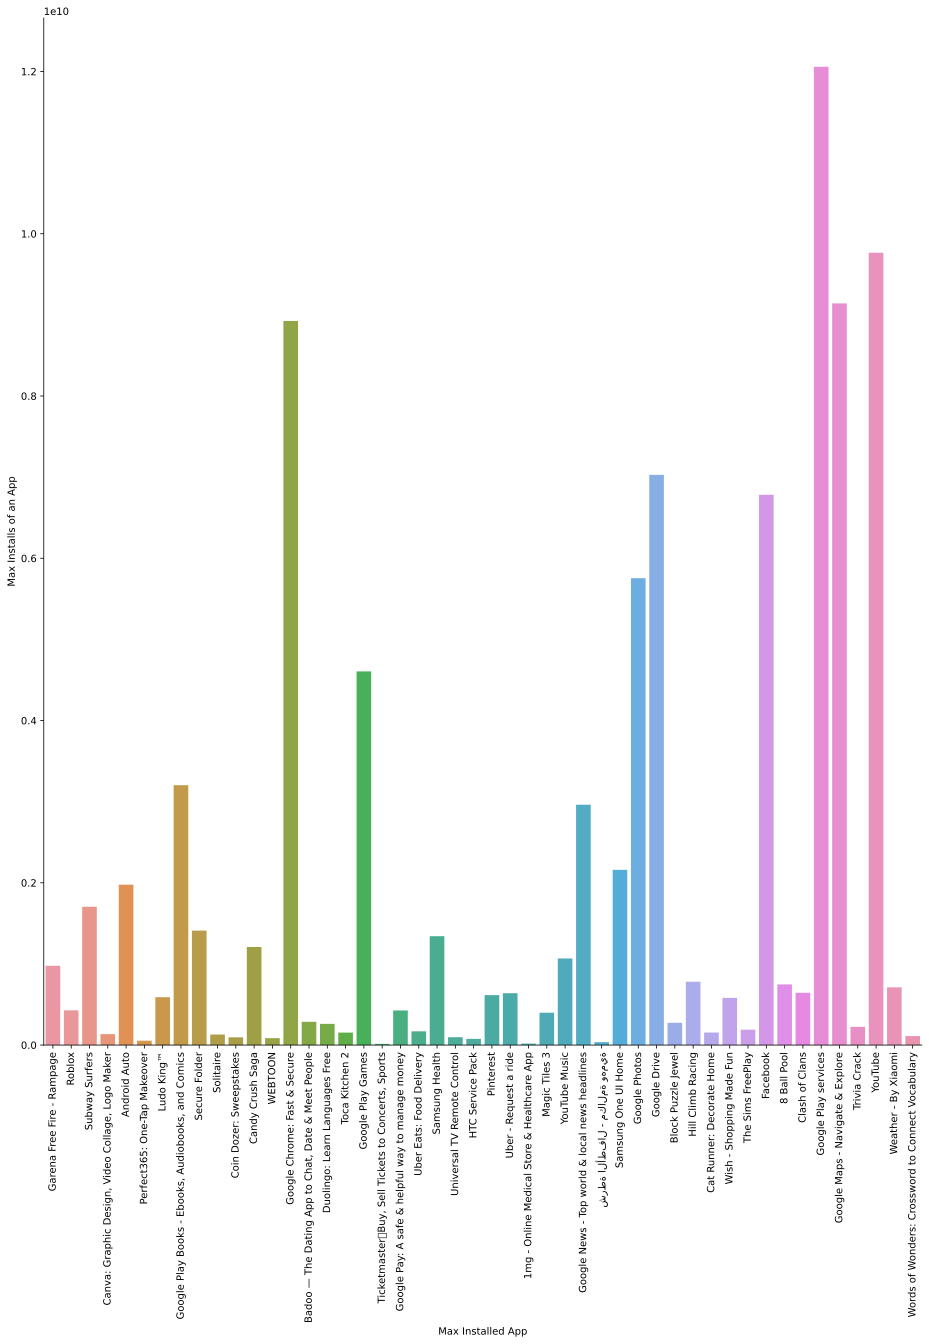

In [261]:
sns.catplot(x= "Max Installed App", y= "Max Installs of an App", kind= 'bar', height= 15, data= dfcat)
plt.xticks(rotation='vertical')
plt.show();

# Questions: 

In [27]:
cols = list(df1.columns.values)
cols


['App Name',
 'App Id',
 'Category',
 'Rating',
 'Rating Count',
 'Installs',
 'Maximum Installs',
 'Free',
 'Price',
 'Currency',
 'Size',
 'Last Updated',
 'Content Rating',
 'Privacy Policy',
 'Ad Supported',
 'In App Purchases',
 'Editors Choice',
 'Size Int']

In [28]:
dfrate= df1[cols[0:5]+ [cols[7]]+ [cols[8]]+[cols[9]]]
dfrate= dfrate[dfrate['Rating Count']>10000]
dffree= dfrate[dfrate['Free']== True]
dfnfr = dfrate[dfrate['Free']== False]


## Question1: What is the Distribution of Rating of Apps wrt Existence of Privacy Policy?

In [29]:
df1["Privacy Policy(T/F)"]= df1["Privacy Policy"].apply(lambda x: False if x=="No Privacy Policy" else True)

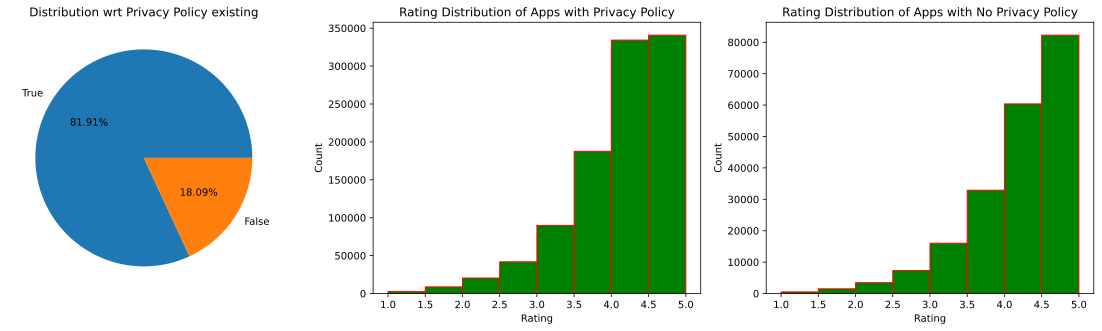

In [30]:
fig,axes= plt.subplots(1,3, figsize= (20,5))
trct= np.count_nonzero(df1["Privacy Policy(T/F)"])
falct= len(df1["Privacy Policy(T/F)"])- trct
axes[0].pie([trct, falct], labels= [True,False], autopct='%1.2f%%')
axes[0].set_title("Distribution wrt Privacy Policy existing")
df1rr= df1[(df1["Privacy Policy(T/F)"]==True)]
df1rrn= df1[(df1["Privacy Policy(T/F)"]==False)]

lixticks= [1,1.5,2,2.5,3,3.5,4,4.5,5]
axes[1].hist(df1rr["Rating"],color='Green',edgecolor='Red', bins= lixticks)
axes[1].set_title("Rating Distribution of Apps with Privacy Policy")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Count")


axes[2].hist(df1rrn["Rating"],color= 'Green', edgecolor='Red', bins=lixticks)
axes[2].set_title("Rating Distribution of Apps with No Privacy Policy")
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Count")
plt.show();

## Question2: What is the Distribition of Rating of Apps wrt Free/Paid?

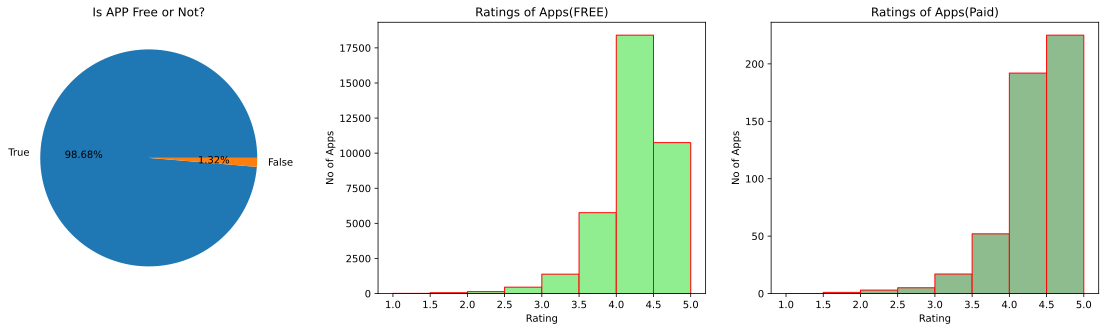

In [31]:
plt.rcParams["figure.figsize"]= (5,5)
fig,axes= plt.subplots(1,3, figsize= (20,5))

lixticks= [1,1.5,2,2.5,3,3.5,4,4.5,5]

axes[0].pie([dffree["App Id"].count(), dfnfr["App Id"].count()], labels=[True, False],autopct='%1.2f%%' )
axes[0].set_title("Is APP Free or Not?")

axes[1].hist(dffree['Rating'],color= 'lightgreen',edgecolor='red', bins=lixticks)
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("No of Apps")
axes[1].set_title("Ratings of Apps(FREE)")
axes[1].set_xticks(lixticks)

axes[2].hist(dfnfr['Rating'],color='darkseagreen',edgecolor='red', bins=lixticks)
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("No of Apps")
axes[2].set_title("Ratings of Apps(Paid)")
axes[2].set_xticks(lixticks)


plt.show();

## Question3: What are the Top 10 Rated Apps in a given Category and their Ratings?

Enter any Category: Action


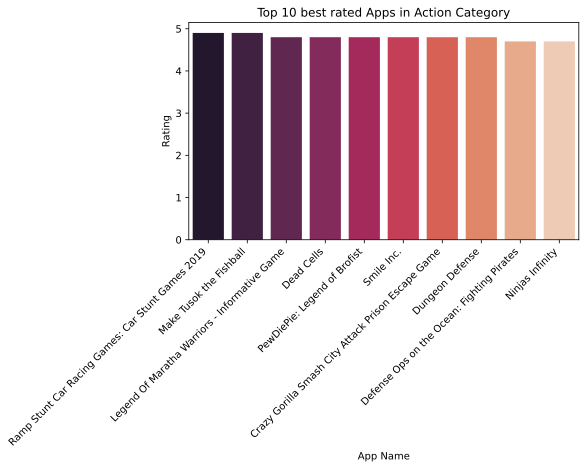

In [32]:
cat= input('Enter any Category: ')
dfcat1= dfrate[dfrate['Category']==cat]
dfcat1.sort_values(by='Rating',ascending=False, inplace=True)
dfcat1= dfcat1.head(10);
plt.rcParams['figure.figsize']= (7,4)
sns.barplot(x='App Name', y='Rating', palette='rocket', data= dfcat1)
plt.title("Top 10 best rated Apps in "+cat+" Category")
plt.xticks(fontsize=10,rotation=45,ha='right')
plt.show();

## Question4: What are the Ratings of the Top 10 Apps in Each Category?

Enter any Category: Social


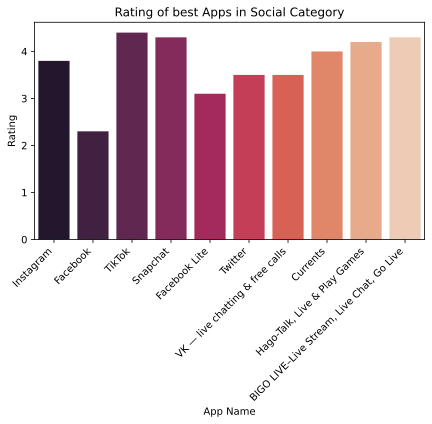

In [33]:
cat= input('Enter any Category: ')
dfcat1= dfrate[dfrate['Category']==cat]
dfcat1.sort_values(by='Rating Count',ascending=False, inplace=True)
dfcat1= dfcat1.head(10);
plt.rcParams['figure.figsize']= (7,4)
sns.barplot(x='App Name', y='Rating', palette='rocket', data= dfcat1)
plt.title("Rating of best Apps in "+cat+" Category")
plt.xticks(fontsize=10,rotation=45,ha='right')
plt.show();

## Question5: What are the overperforming Apps According to each Category?

In [34]:
dfcat['Overperformance']= dfcat['Max Installs of an App']/dfcat['Average Installs']
dfop= dfcat.sort_values(by= 'Overperformance', ascending=False)
dfop['Overperformance']= dfop['Overperformance'].apply(lambda x: round(x,2))
dfop

,Category,Count of Apps,Average Installs,Max Installs of an App,Max Installed App,Overperformance
7,Books & Reference,116493,88489,3202676731,"Google Play Books - Ebooks, Audiobooks, and Co...",36192.94
43,Travel & Local,66667,278087,9141671889,Google Maps - Navigate & Explore,32873.42
8,Business,142151,60329,1410817280,Secure Folder,23385.39
17,Entertainment,137578,236360,4605543029,Google Play Games,19485.29
29,News & Magazines,42583,207217,2961820154,Google News - Top world & local news headlines,14293.33
42,Tools,141972,843925,12057627016,Google Play services,14287.56
21,Health & Fitness,82598,97651,1341624888,Samsung Health,13738.98
33,Productivity,78244,579697,7028265259,Google Drive,12124.03
4,Auto & Vehicles,17951,170032,1976625745,Android Auto,11625.02
31,Personalization,89012,196281,2158959897,Samsung One UI Home,10999.33


C:\Users\smurk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smurk\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 65293 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


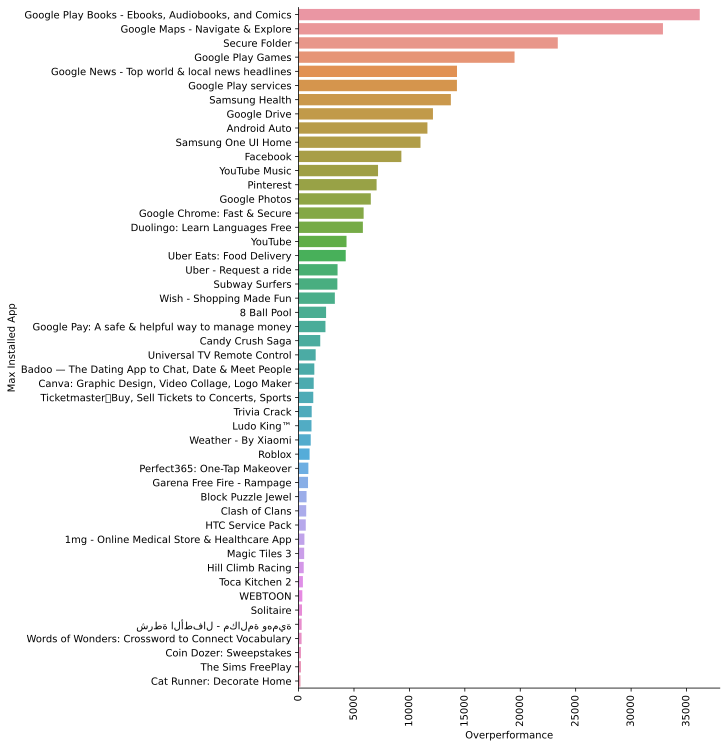

In [35]:
sns.catplot(x='Overperformance',y= "Max Installed App",kind='bar' ,height= 10,data= dfop)

plt.xticks(rotation='vertical')
plt.show();

## Question6: What is the distribution of Apps wrt their Size(in MB)?

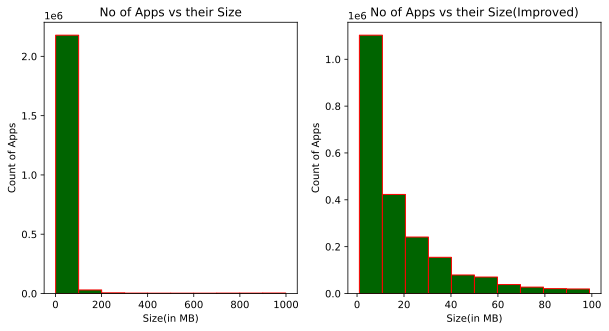

In [36]:
fig,axes= plt.subplots(1,2, figsize= (10,5))

axes[0].hist(df1['Size Int'], color='darkgreen', edgecolor= 'Red')
axes[0].set_title("No of Apps vs their Size")
axes[0].set_xlabel("Size(in MB)")
axes[0].set_ylabel("Count of Apps")

df1a= df1[df1["Size Int"]<100]

axes[1].hist(df1a['Size Int'], color='darkgreen', edgecolor='Red')
axes[1].set_title("No of Apps vs their Size(Improved)")
axes[1].set_xlabel("Size(in MB)")
axes[1].set_ylabel("Count of Apps")
plt.show();

## Question7: What is the Distribution of Ratings of Apps Depending on whether they have Advertisments or Not?

In [272]:
df_fr_ad= df1[(df1['Free']== True) & (df1["Ad Supported"]==True)]
df_fr_noad= df1[(df1['Free']==True) & (df1['Ad Supported']==False)]



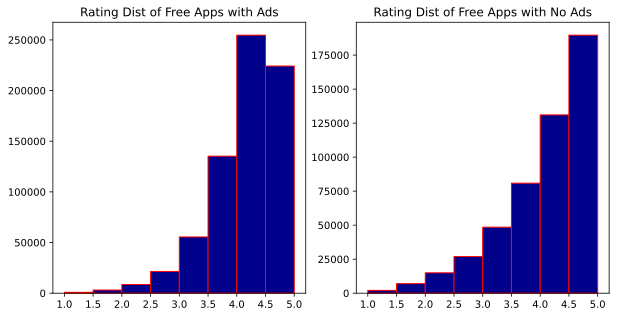

In [273]:
plt.rcParams["figure.figsize"]= (5,5)
fig,axes= plt.subplots(1,2, figsize= (10,5))
lixticks= [1,1.5,2,2.5,3,3.5,4,4.5,5]

axes[0].hist(df_fr_ad['Rating'],color='darkblue', edgecolor='red', bins= lixticks)
axes[0].set_title("Rating Dist of Free Apps with Ads")
axes[0].set_xticks(lixticks)

axes[1].hist(df_fr_noad['Rating'],color='darkblue',edgecolor='red', bins= lixticks)
axes[1].set_title("Rating Dist of Free Apps with No Ads")
axes[1].set_xticks(lixticks)

plt.show();

## Question8: What is the Distribution of Rating of Apps depending on whether they have In-App Purchases or Not?

In [274]:
df_fr_ia= df1[(df1['Free']== True) & (df1["In App Purchases"]==True)]
print(df_fr_ia.shape)
df_fr_noia= df1[(df1['Free']== True) & (df1["In App Purchases"]==False)]
df_fr_noia.shape

(189742, 19)


(2055476, 19)

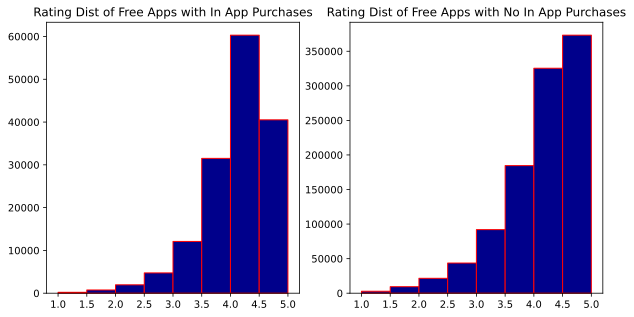

In [275]:
plt.rcParams["figure.figsize"]= (5,5)
fig,axes= plt.subplots(1,2, figsize= (10,5))
lixticks= [1,1.5,2,2.5,3,3.5,4,4.5,5]

axes[0].hist(df_fr_ia['Rating'],color='darkblue', edgecolor='red', bins= lixticks)
axes[0].set_title("Rating Dist of Free Apps with In App Purchases")
axes[0].set_xticks(lixticks)

axes[1].hist(df_fr_noia['Rating'],color='darkblue',edgecolor='red', bins= lixticks)
axes[1].set_title("Rating Dist of Free Apps with No In App Purchases")
axes[1].set_xticks(lixticks)

plt.show();

## Question9: What is the Relation between Rating of Apps and their Prices?

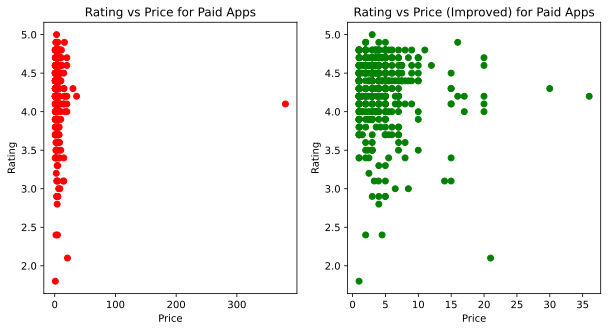

In [278]:
fig,axes= plt.subplots(1,2, figsize= (10,5))


axes[0].scatter(x= 'Price', y='Rating',color='Red', data=dfnfr)
axes[0].set_title('Rating vs Price for Paid Apps')
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Rating")
dfnfra= dfnfr[dfnfr["Price"]<50]
axes[1].scatter(x='Price', y='Rating',color='Green', data=dfnfra)
axes[1].set_title(('Rating vs Price (Improved) for Paid Apps'))
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Rating")
plt.show();